In [5]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
new_df = pd.DataFrame()
files = os.listdir('results')
for f in files[:5]:
    df = pd.read_csv(f'results/{f}')
    df = df.drop(columns = ['Unnamed: 0'])
    df = df[df['balanced_accuracy']!=0.5]

    new_df = new_df.append(df,ignore_index=True)

new_df2 = pd.DataFrame()

for f in files[5:]:
    df = pd.read_csv(f'results/{f}')
    df = df.drop(columns = ['Unnamed: 0'])
    df = df[df['balanced_accuracy']!=0.5]


    new_df2 = new_df2.append(df,ignore_index=True)


In [7]:
new_df=new_df.replace('sem pré-processamento','Sem pré-processamento')
new_df=new_df.replace('RW','Reweighing')
new_df=new_df.replace('MSS','Massaging')
new_df=new_df.replace('DIR','Disparate Impact Remover')
new_df=new_df.replace('PS','Preferential Sampling')
new_df=new_df.replace('US','Uniform Sampling')

new_df2=new_df2.replace('sem pré-processamento','Sem pré-processamento')
new_df2=new_df2.replace('RW','Reweighing')
new_df2=new_df2.replace('MSS','Massaging')
new_df2=new_df2.replace('DIR','Disparate Impact Remover')
new_df2=new_df2.replace('PS','Preferential Sampling')
new_df2=new_df2.replace('US','Uniform Sampling')




In [108]:
new_df2

,dataset,preprocessing,clf_type,params,accuracy,dif_accuracy,balanced_accuracy,dif_balanced_accuracy,recall,dif_recall,precision,dif_precision,fpr,dif_fpr,selection_rate,dif_selection_rate,dif_statistical_parity,dif_equal_opp,dif_avg_odds,disparate_impacto_ratio
0,Compas,Sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.670016,0.009994,0.663138,0.047972,0.585954,0.200627,0.654181,0.081055,0.259678,0.104684,0.408296,0.175767,0.175767,0.200627,0.152655,1.610619
1,Compas,Sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.638401,0.018516,0.645511,0.021843,0.725507,0.145089,0.585606,0.093191,0.434485,0.101402,0.567040,0.147142,0.147142,0.145089,0.123246,1.307276
2,Compas,Sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'max_depth': 7, 'splitte...",0.668884,0.017436,0.658931,0.047113,0.547166,0.180188,0.666885,0.082106,0.229303,0.085963,0.374085,0.155663,0.155663,0.180188,0.133076,1.574493
3,Compas,Sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'max_depth': 7, 'splitte...",0.661912,0.013210,0.649982,0.047319,0.515866,0.170335,0.668298,0.085297,0.215902,0.075697,0.352530,0.143919,0.143919,0.170335,0.123016,1.574061
4,Compas,Sem pré-processamento,Decision Tree,"{'criterion': 'gini', 'max_depth': 11, 'splitt...",0.651370,0.012452,0.642906,0.042096,0.547873,0.148509,0.636770,0.103271,0.262061,0.064316,0.392245,0.126878,0.126878,0.148509,0.106413,1.410029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Titanic,Uniform Sampling,SVM2,"{'gamma': 0.1, 'kernel': 'linear', 'random_sta...",0.676484,0.042331,0.662752,0.156257,0.602633,0.089365,0.577448,0.660903,0.277129,0.223150,0.402477,0.136196,0.136196,0.089365,0.066893,0.724599
2220,Titanic,Uniform Sampling,SVM2,"{'gamma': 0.01, 'kernel': 'rbf', 'random_state...",0.693386,0.082418,0.673462,0.037366,0.585431,0.036706,0.602221,0.533951,0.238506,0.038026,0.372097,0.193095,0.193095,0.036706,0.001462,0.617780
2221,Titanic,Uniform Sampling,SVM2,"{'gamma': 0.01, 'kernel': 'linear', 'random_st...",0.677613,0.030717,0.663093,0.145246,0.599658,0.071653,0.580597,0.653207,0.273473,0.218839,0.399086,0.131587,0.131587,0.071653,0.073593,0.729968
2222,Titanic,Uniform Sampling,SVM2,"{'gamma': 0.001, 'kernel': 'rbf', 'random_stat...",0.702413,0.180240,0.667558,0.061722,0.514979,0.053299,0.641045,0.482462,0.179864,0.071699,0.308914,0.157794,0.157794,0.053299,0.038214,0.625148


In [9]:
performance_metrics = ['accuracy','balanced_accuracy','recall','precision','fpr']
fairness_measures = {
    'dif_accuracy',
    'dif_balanced_accuracy',
    'dif_recall',
    'dif_precision',
    'dif_fpr',
    'dif_selection_rate',
    'dif_statistical_parity', 
    'dif_equal_opp', 
    'dif_avg_odds', 
    'disparate_impacto_ratio' 
}


<ipython-input-10-90e30b855ca6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


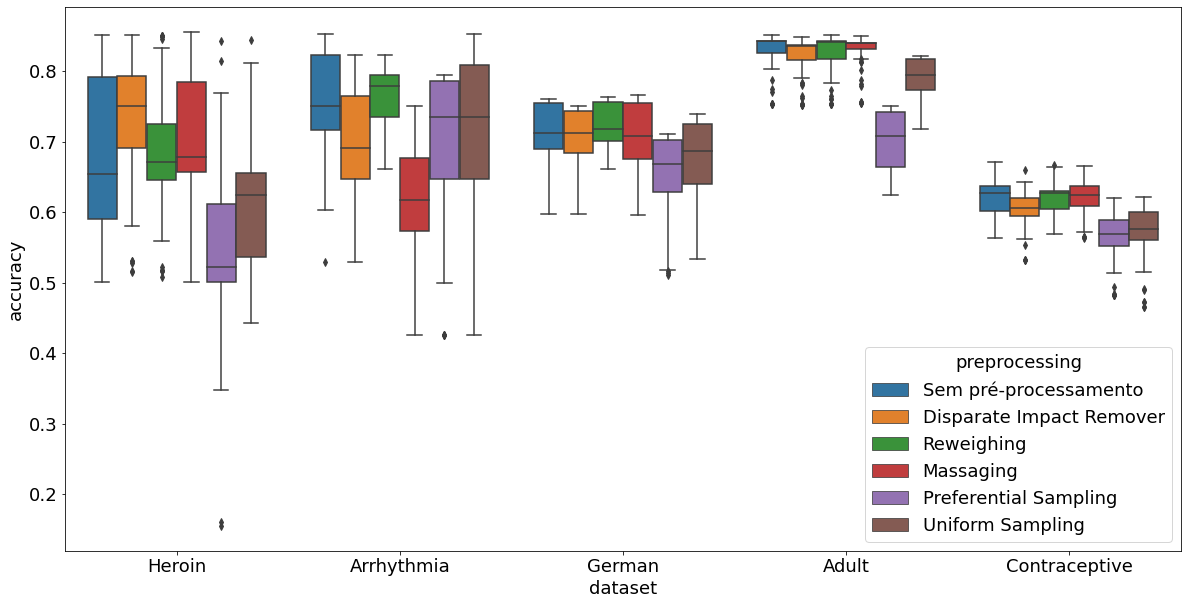

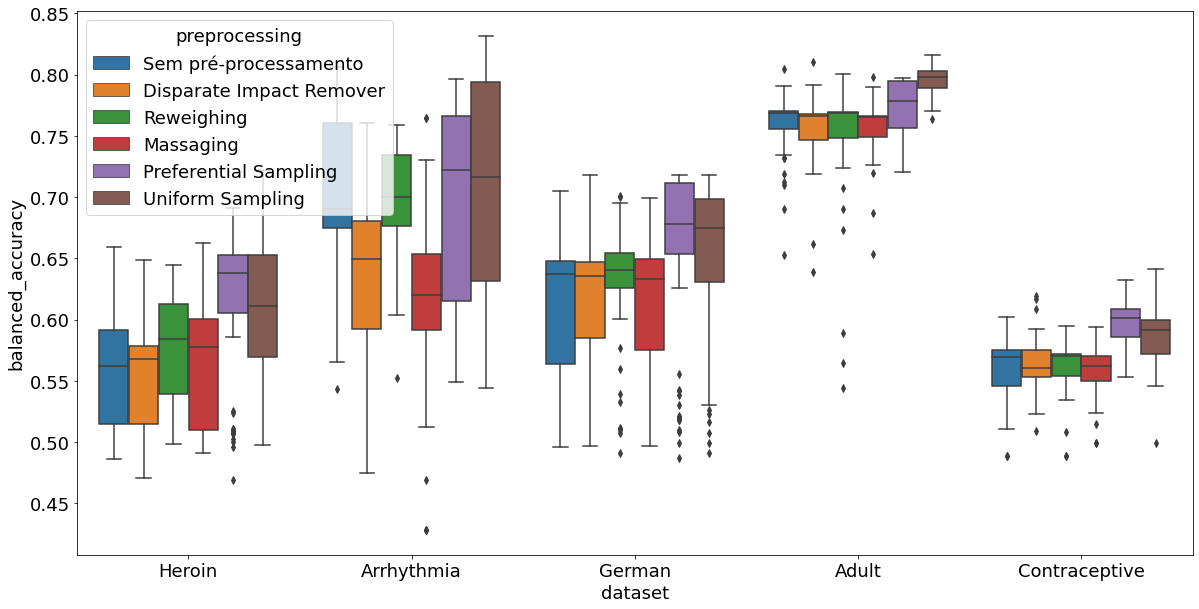

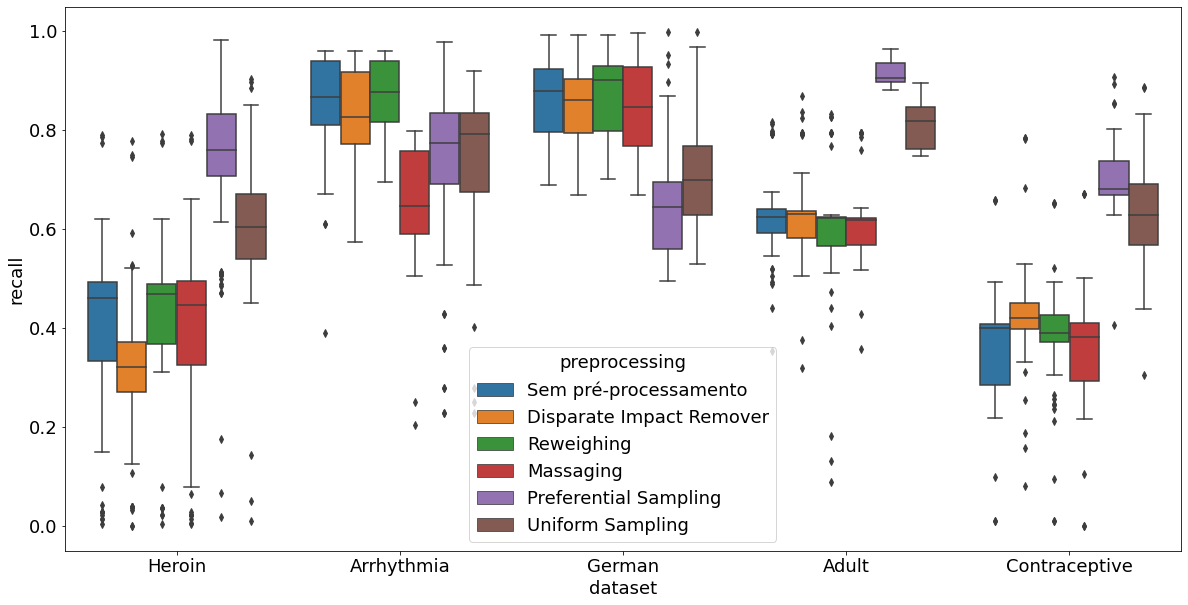

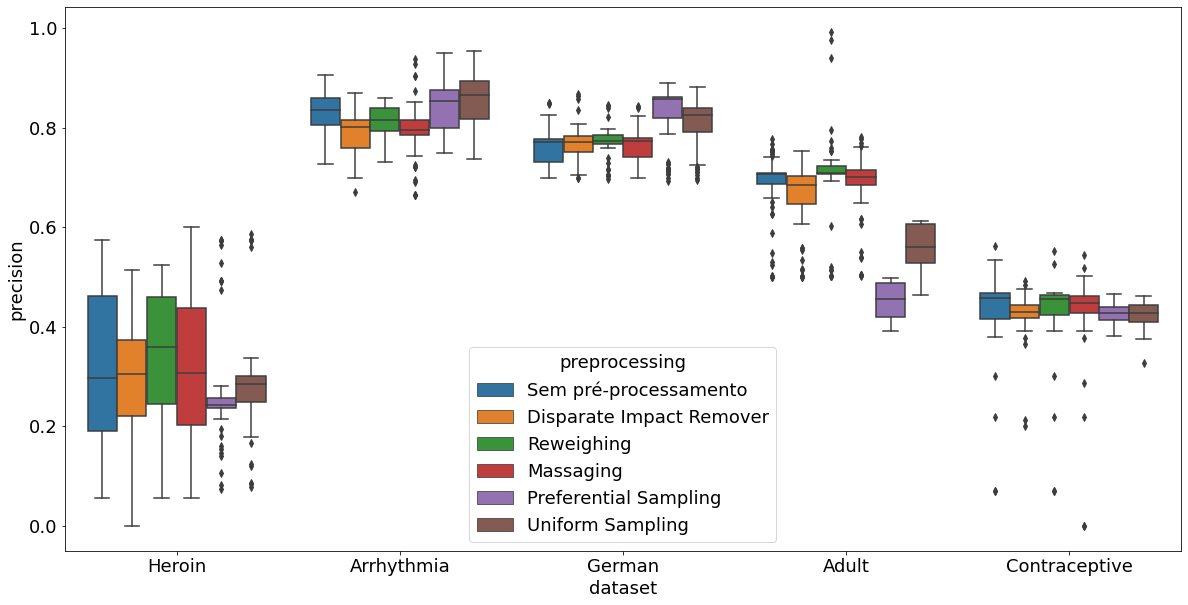

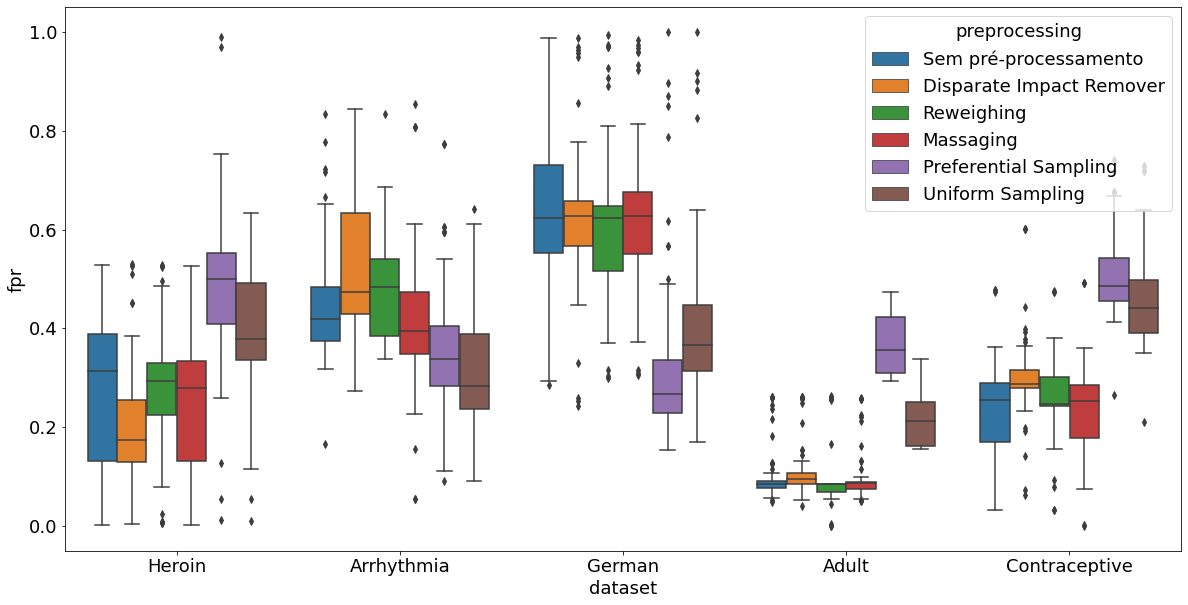

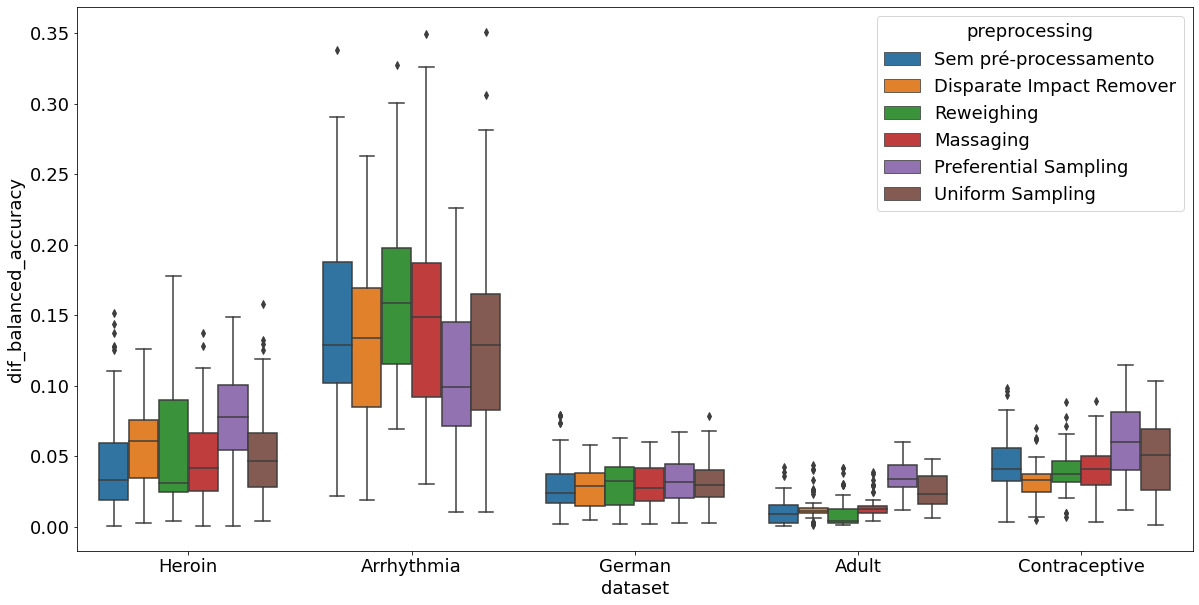

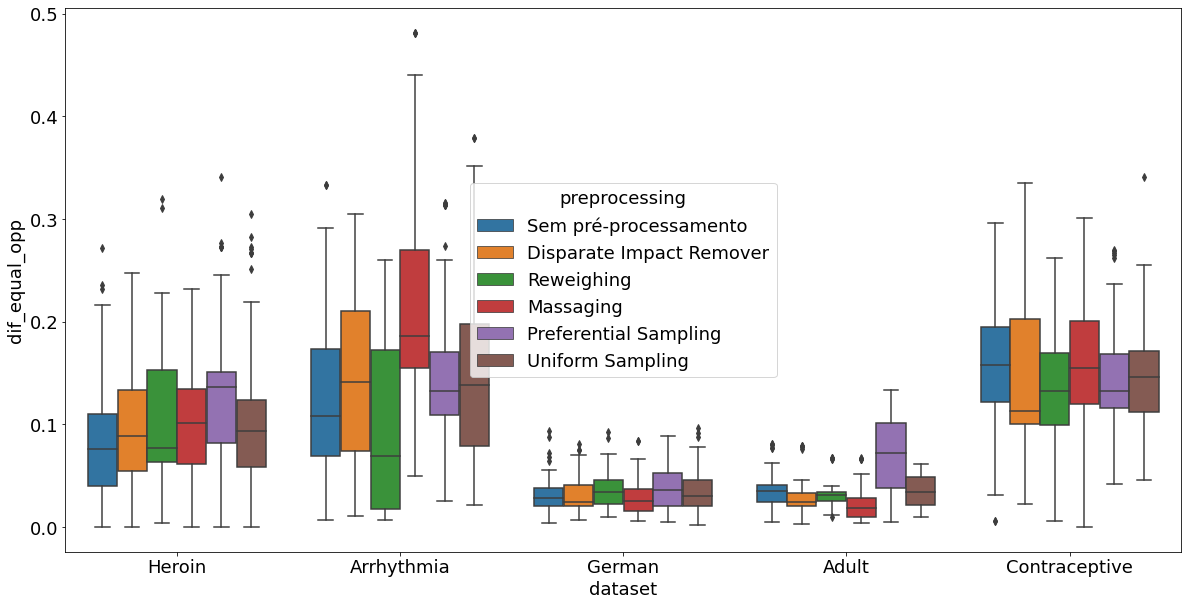

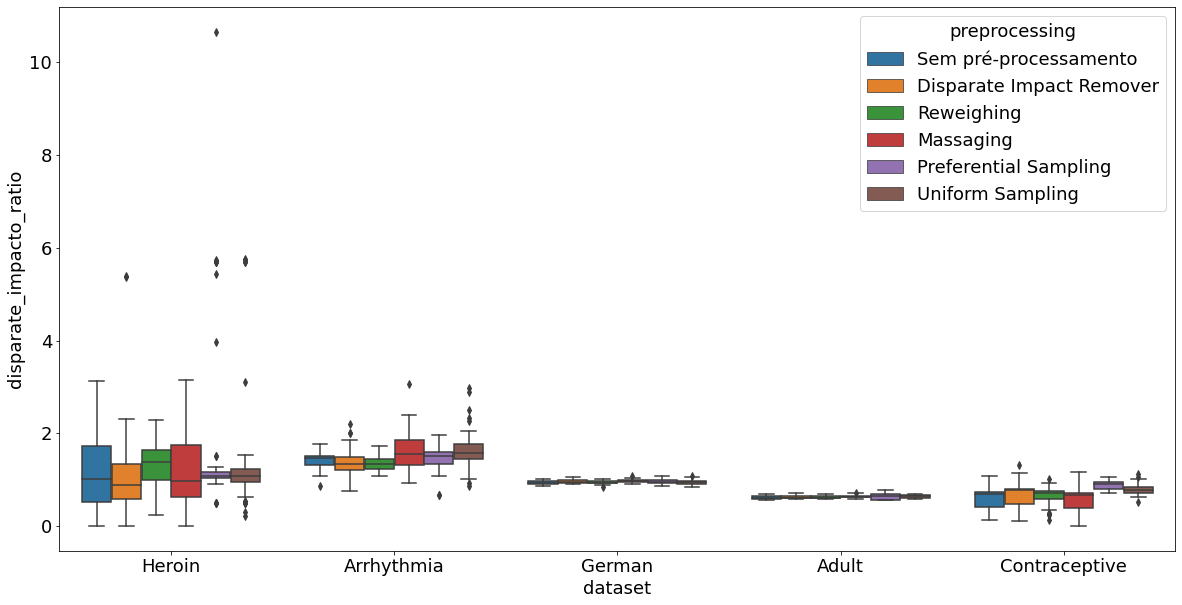

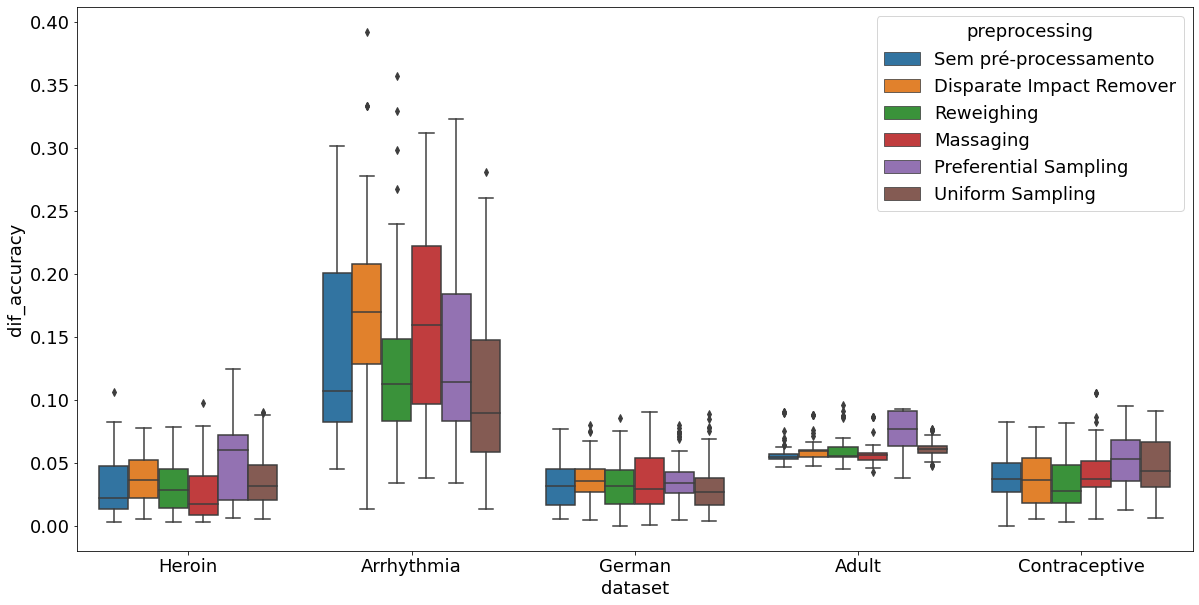

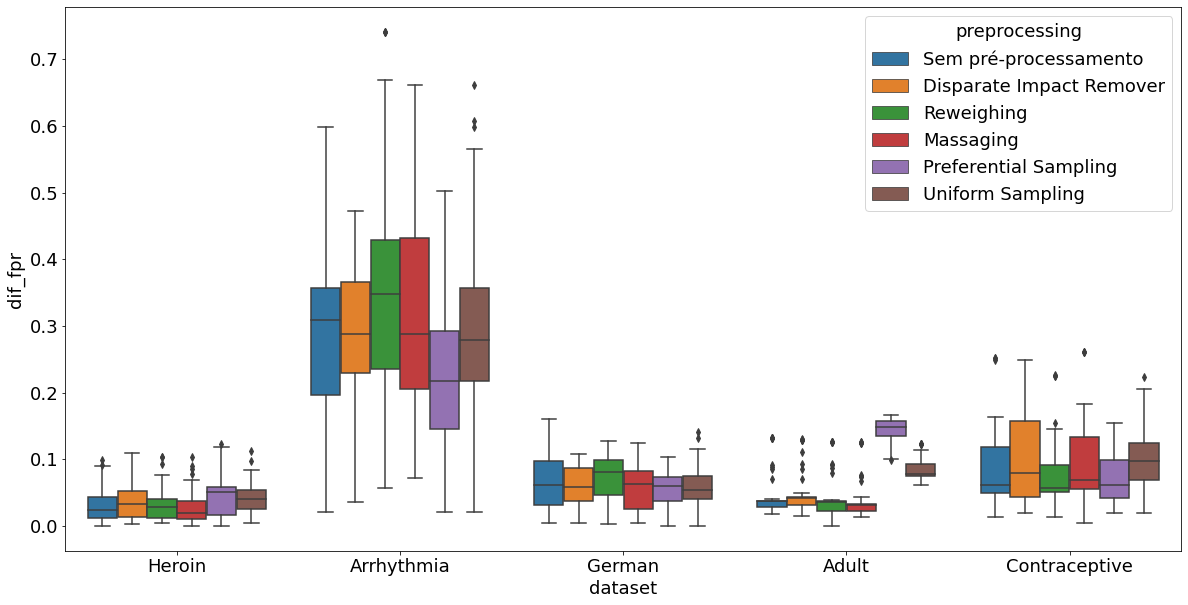

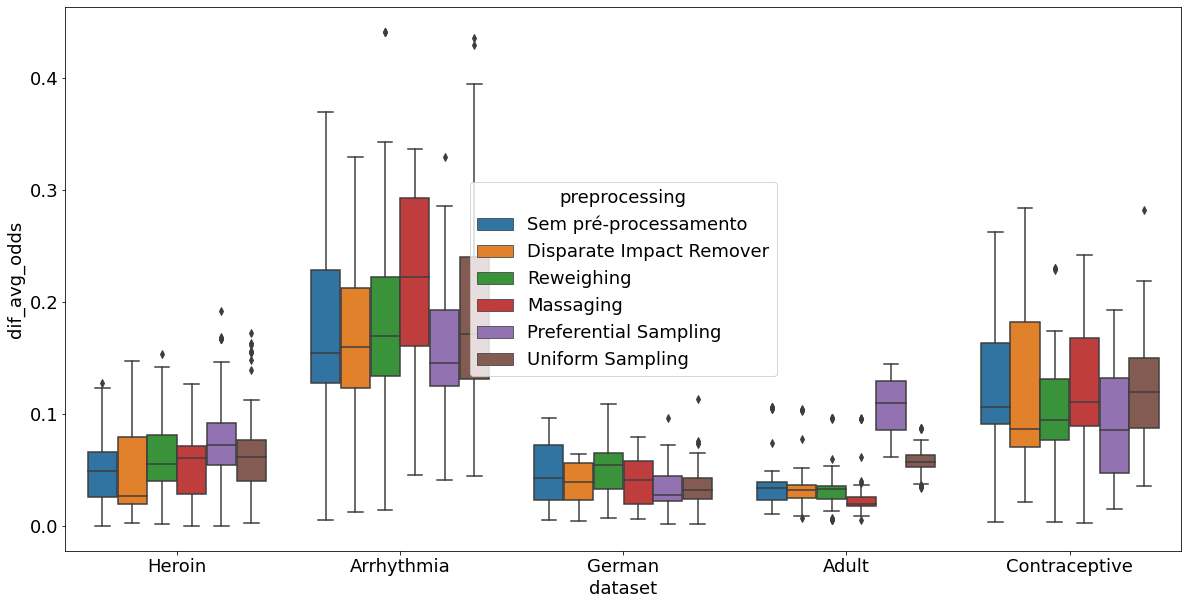

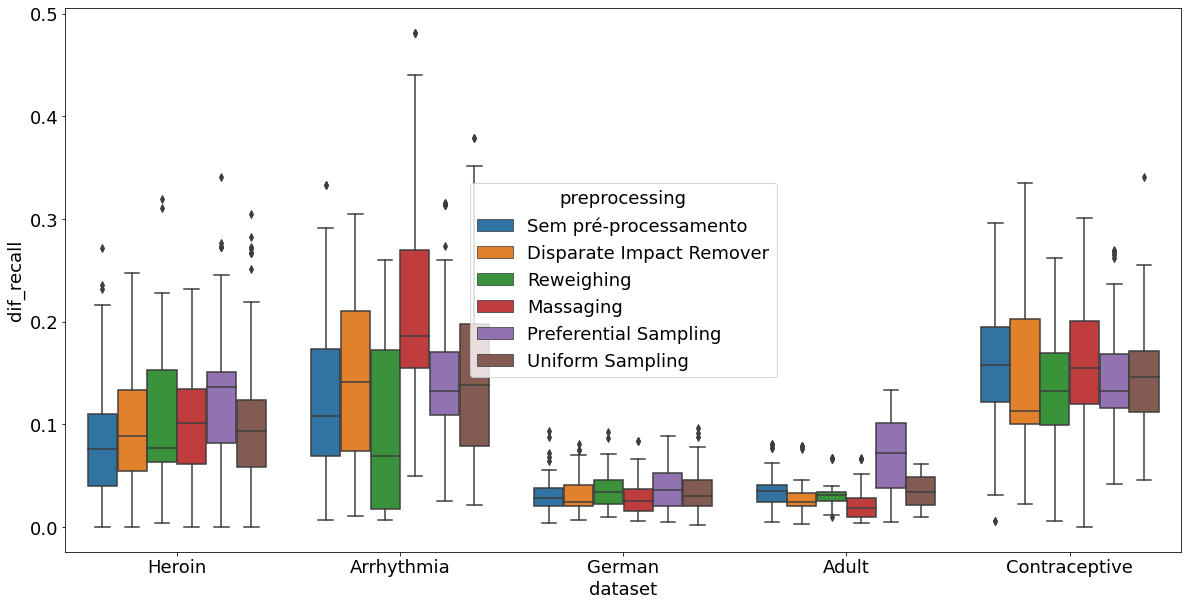

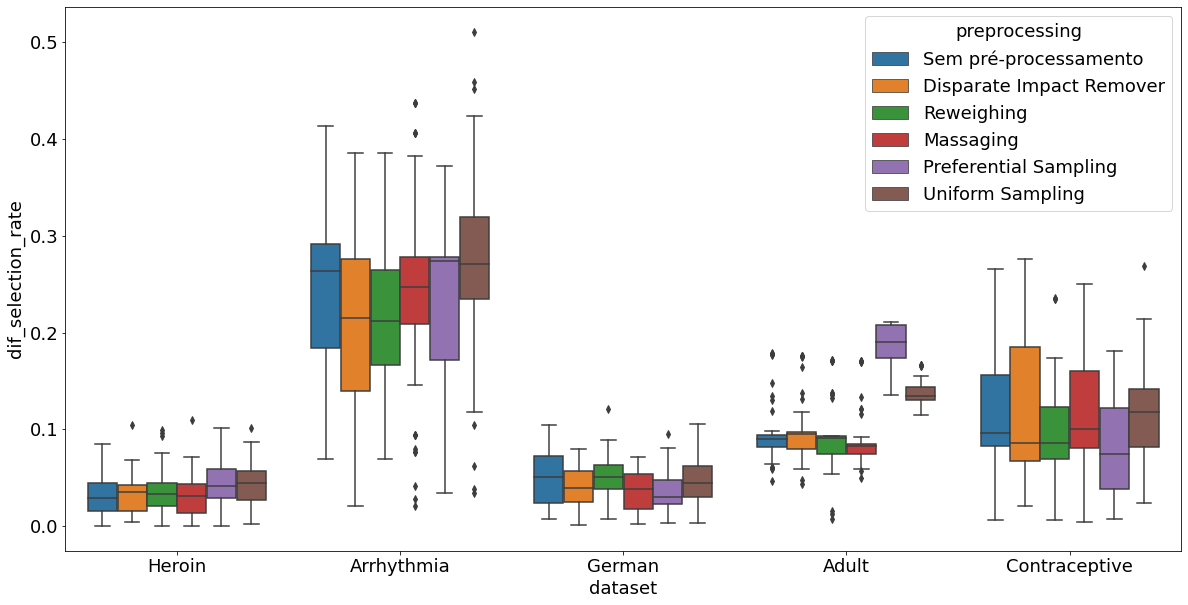

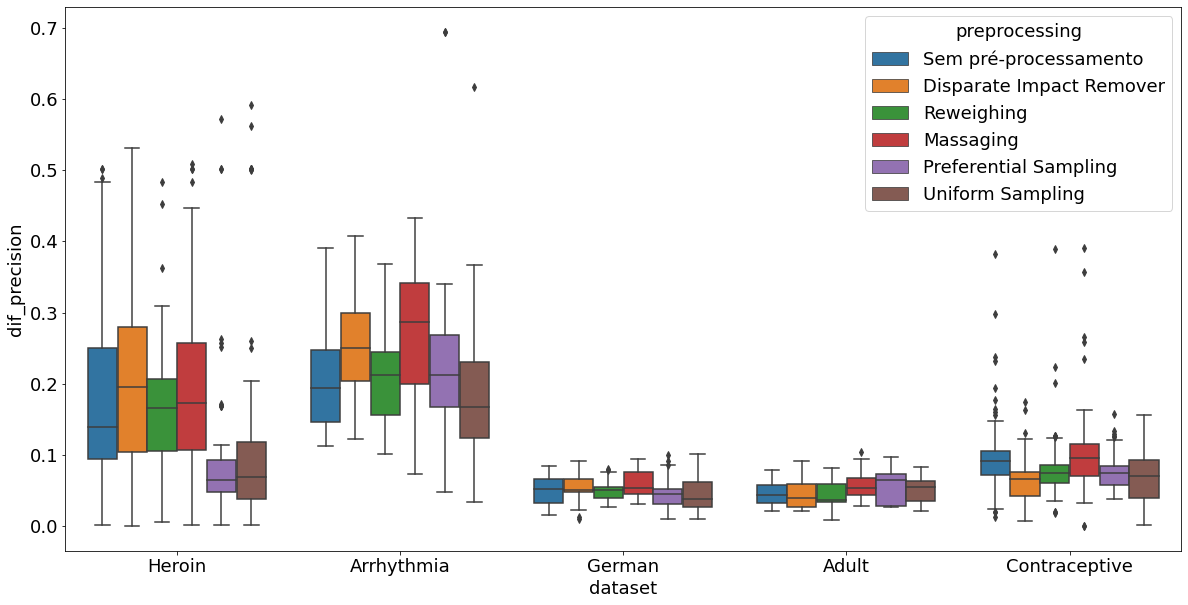

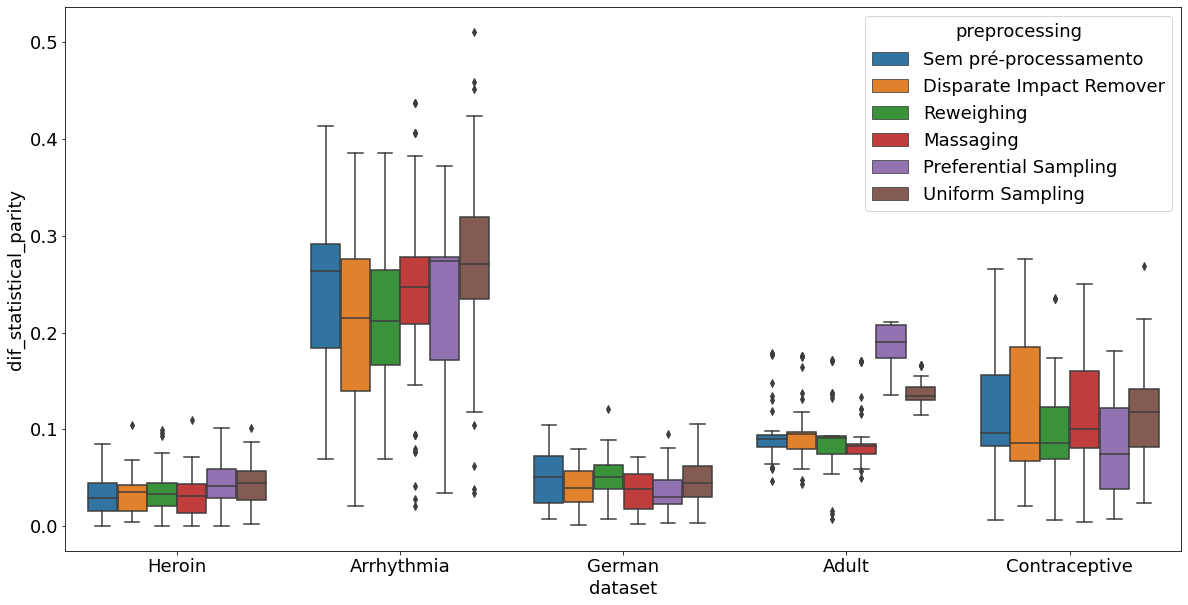

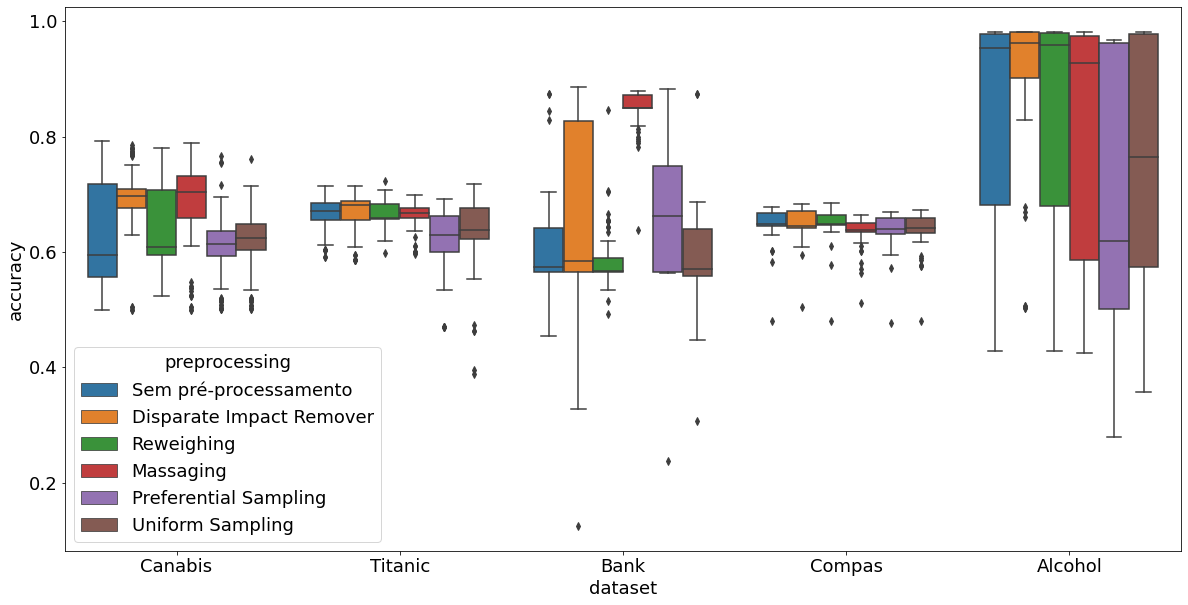

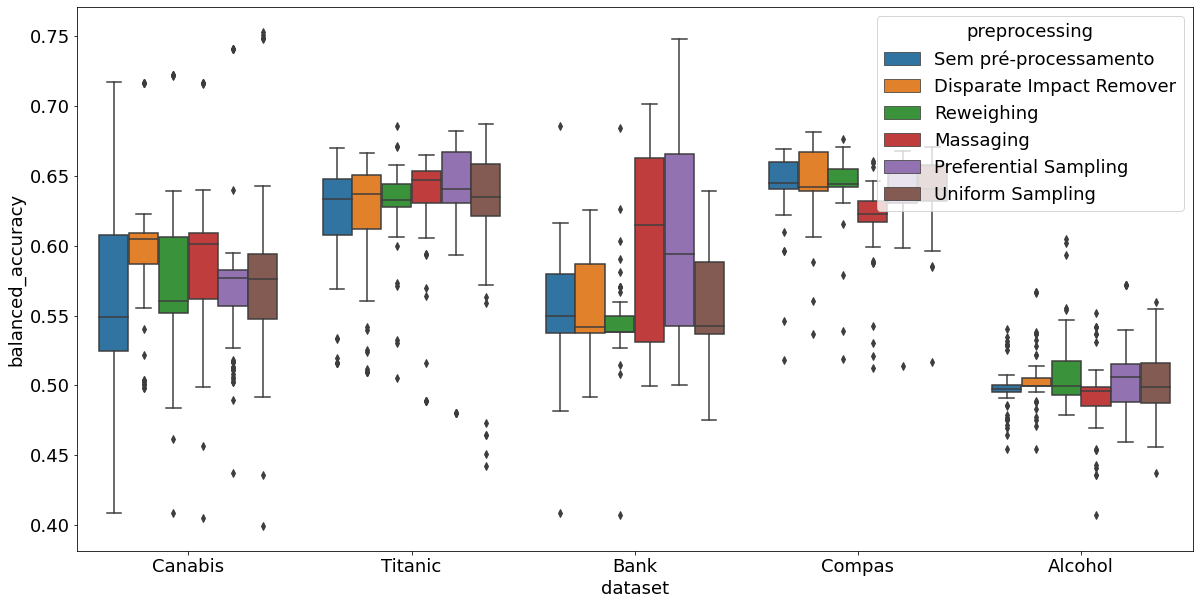

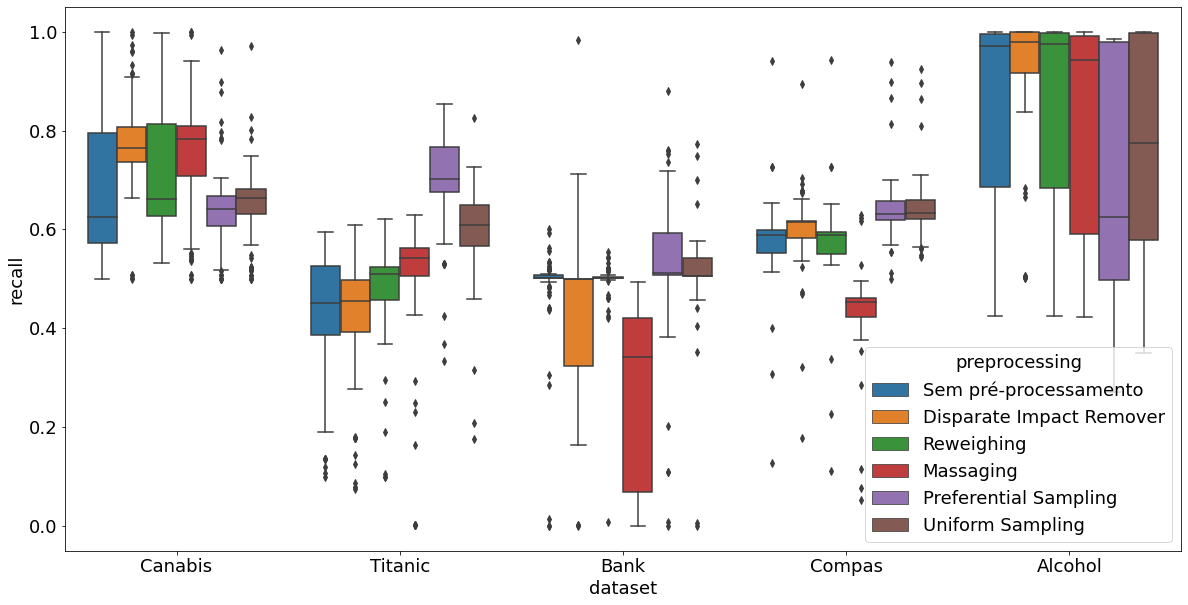

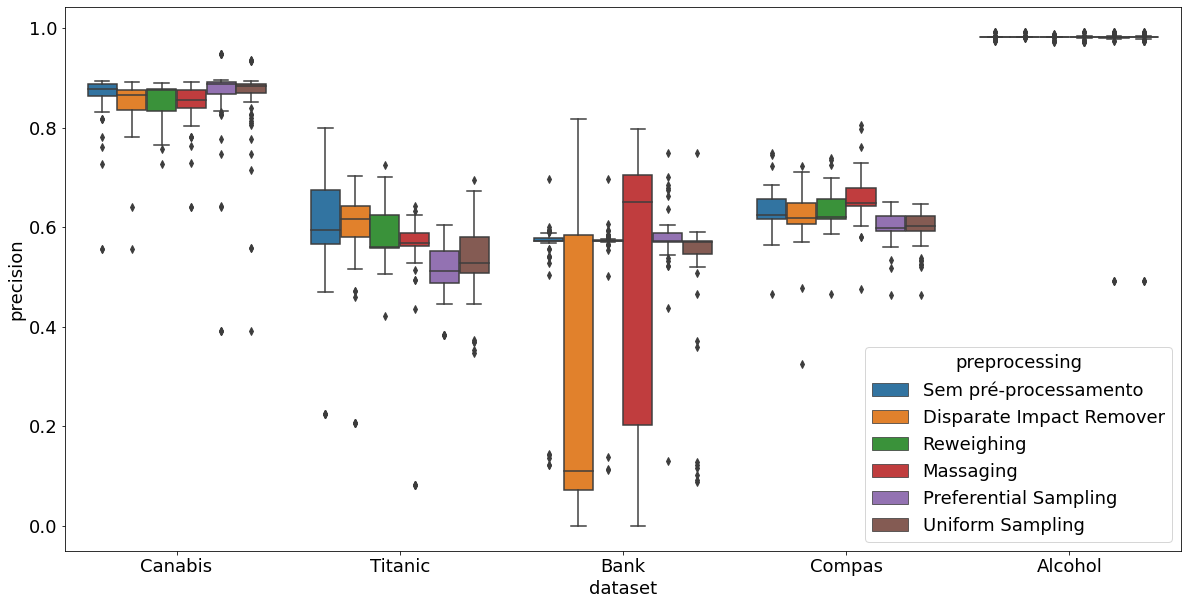

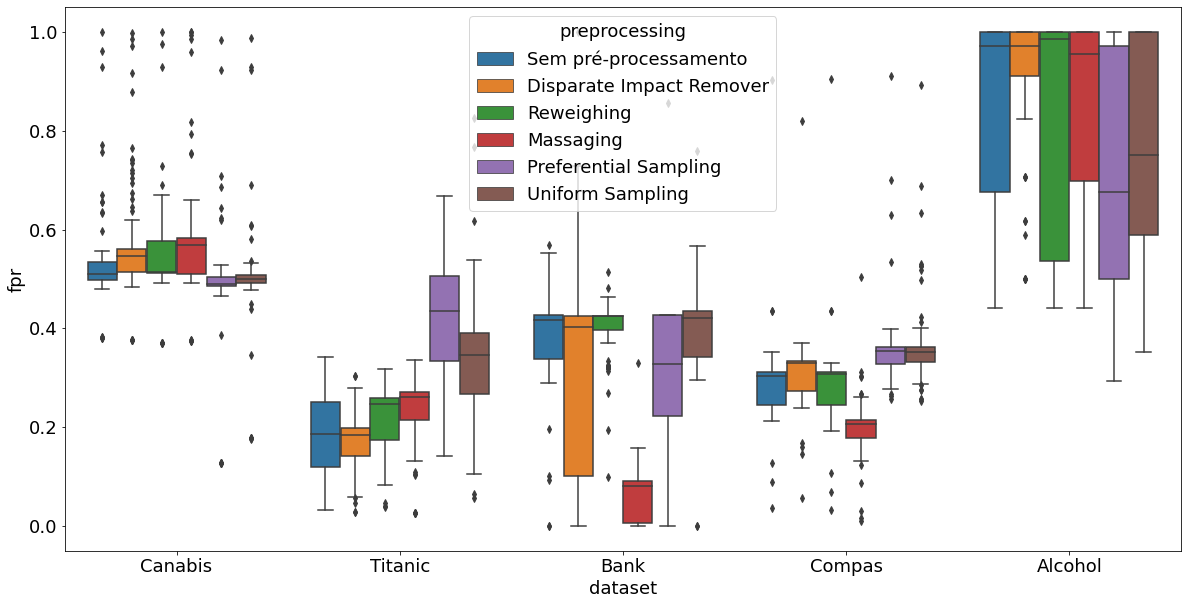

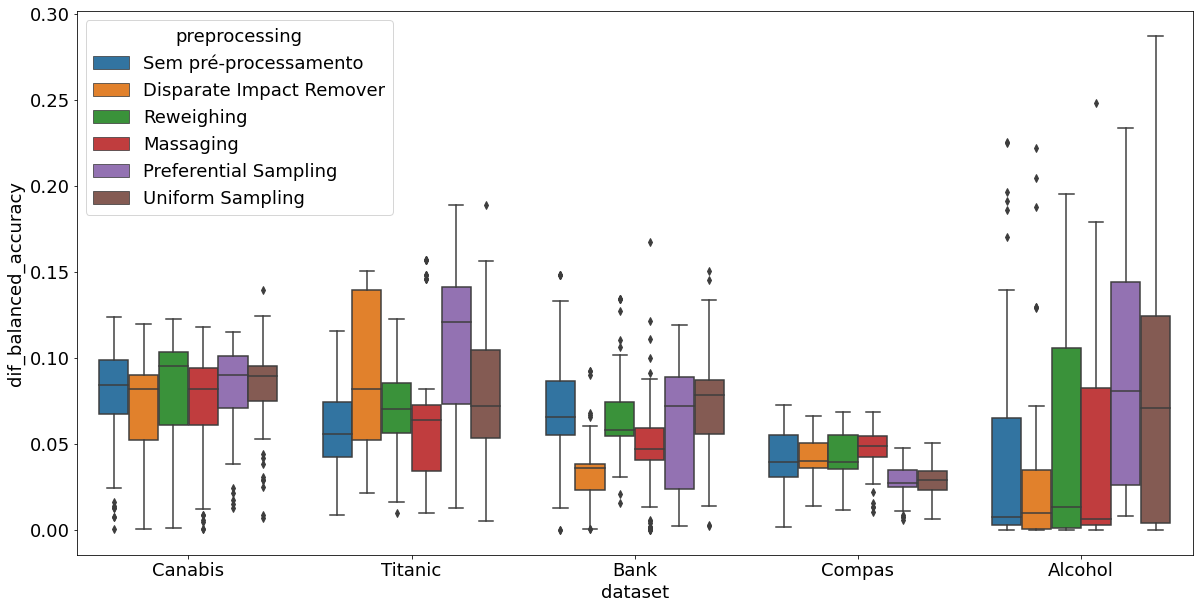

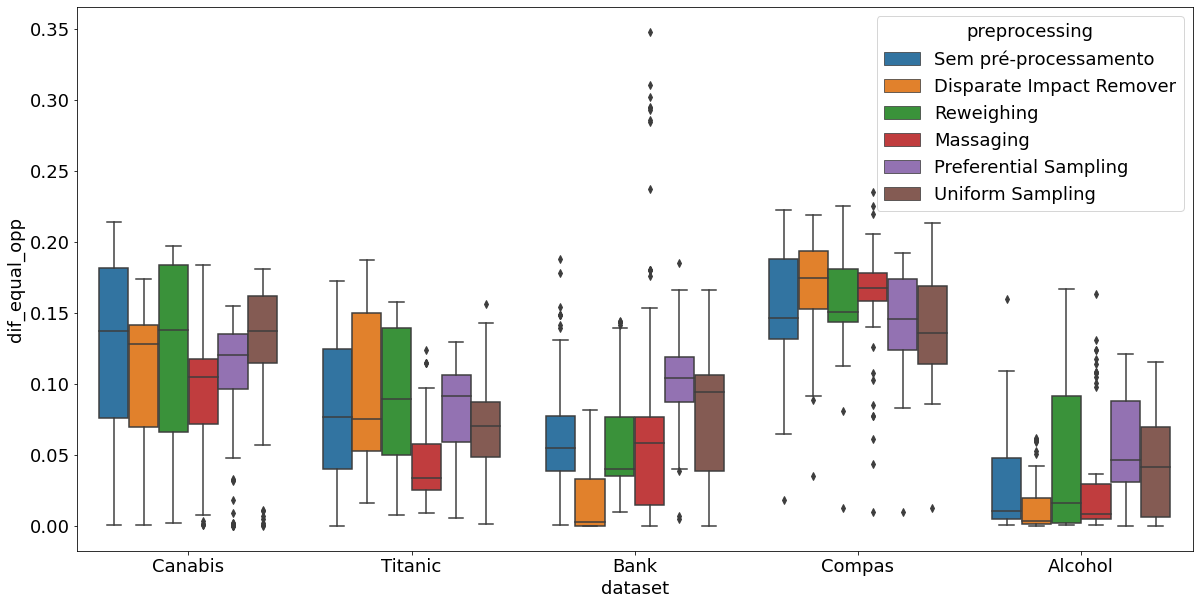

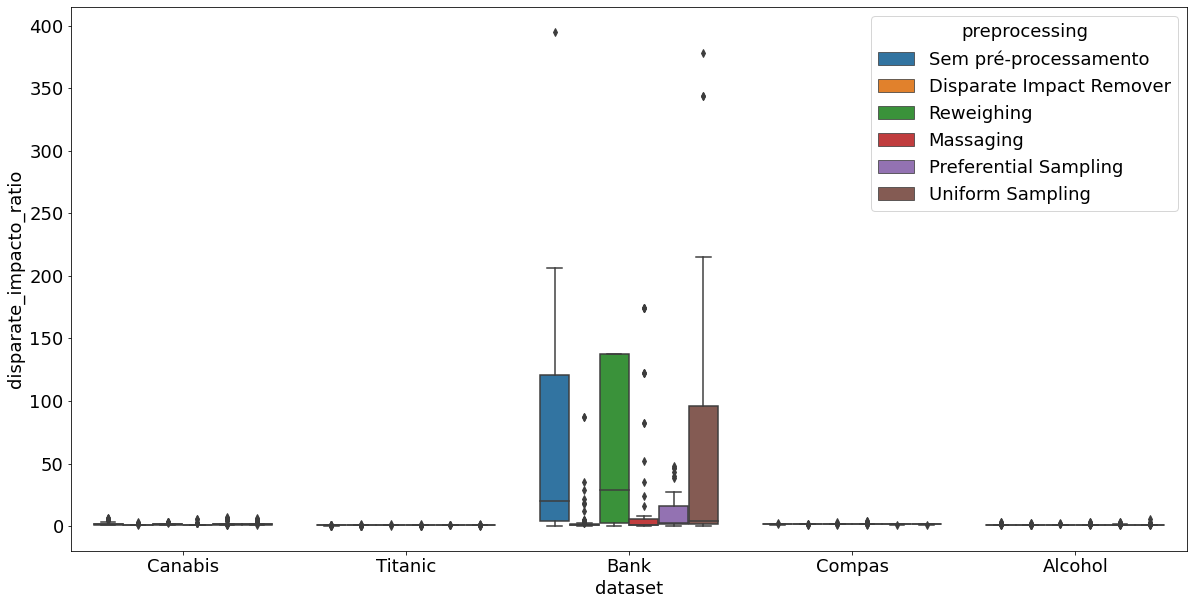

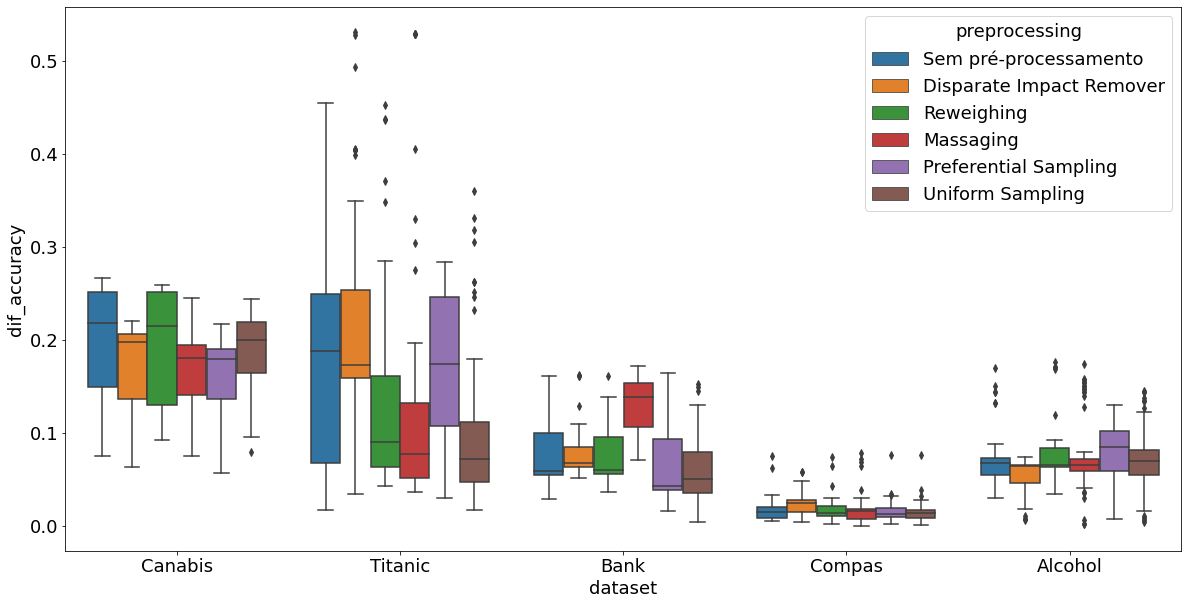

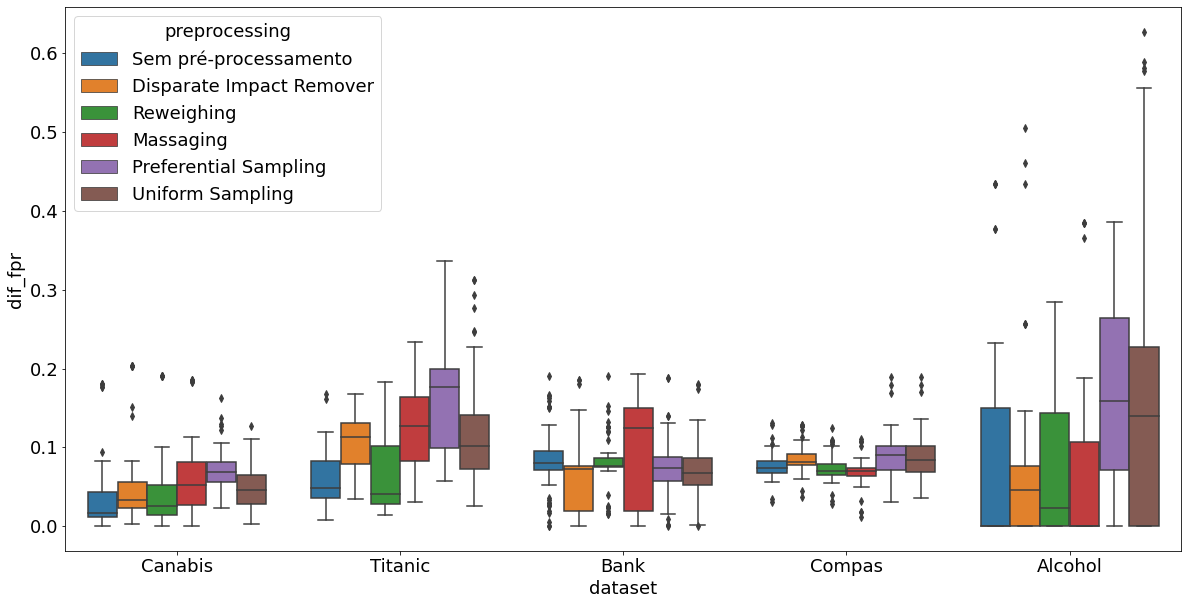

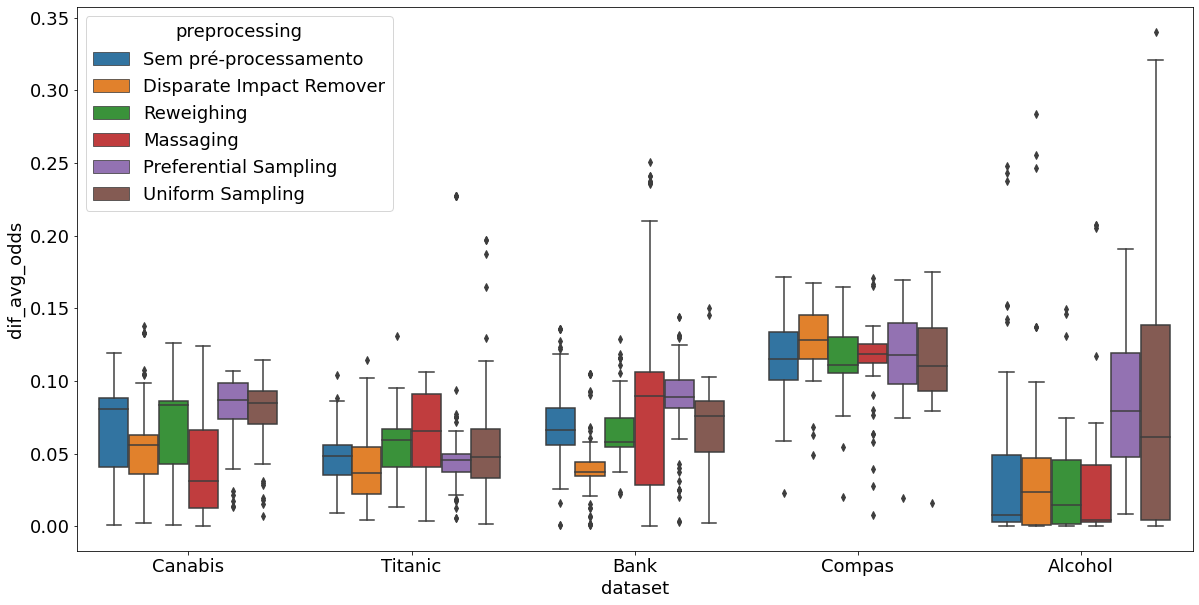

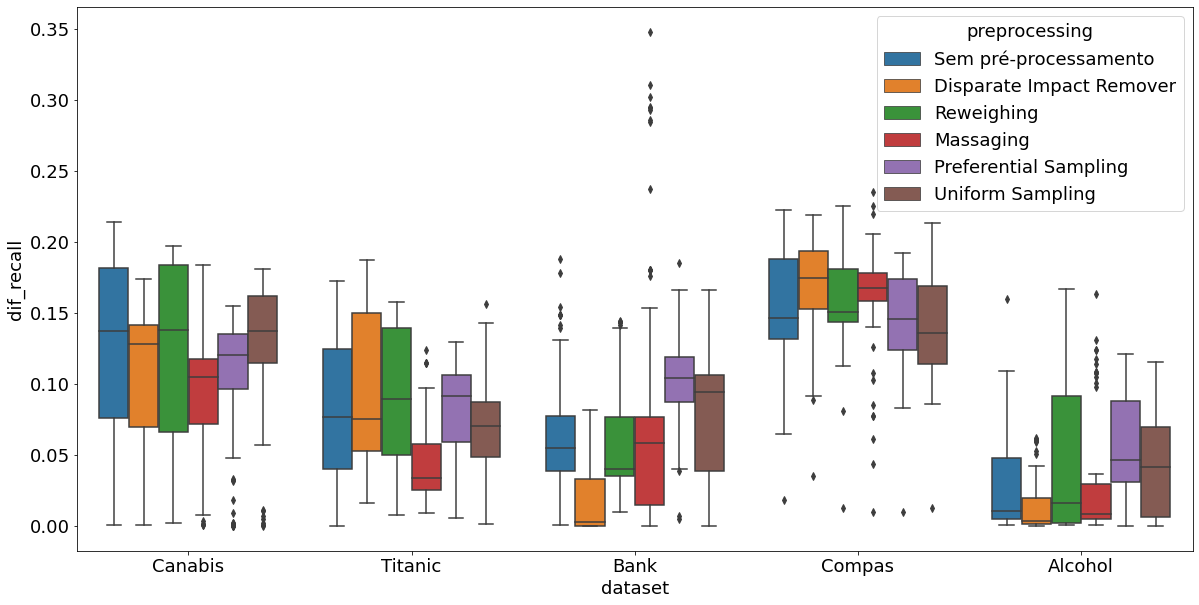

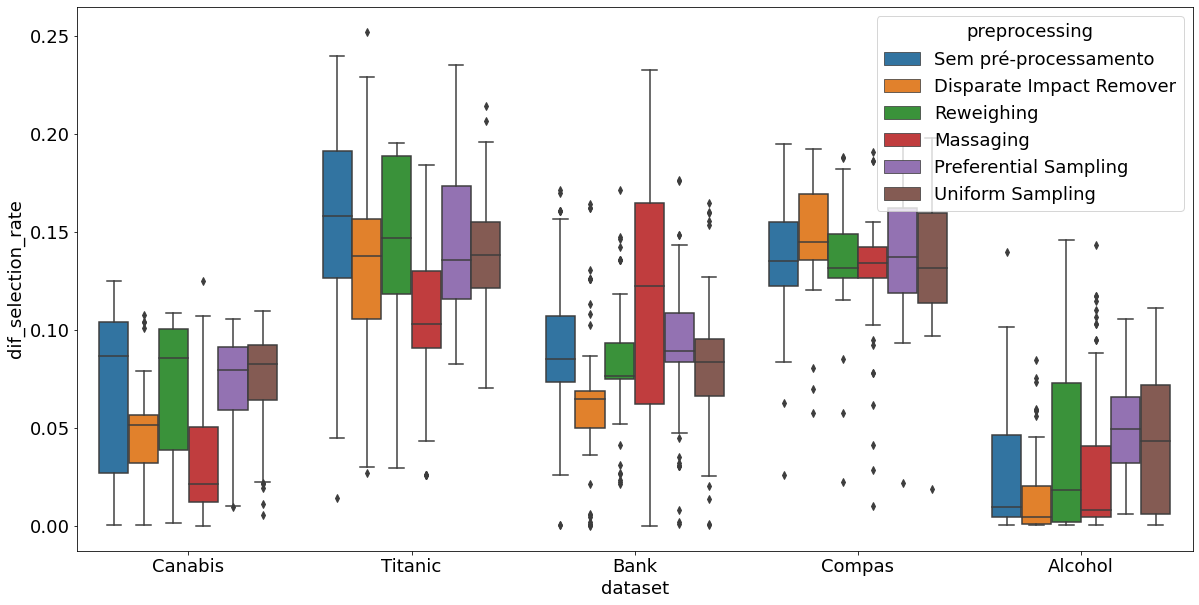

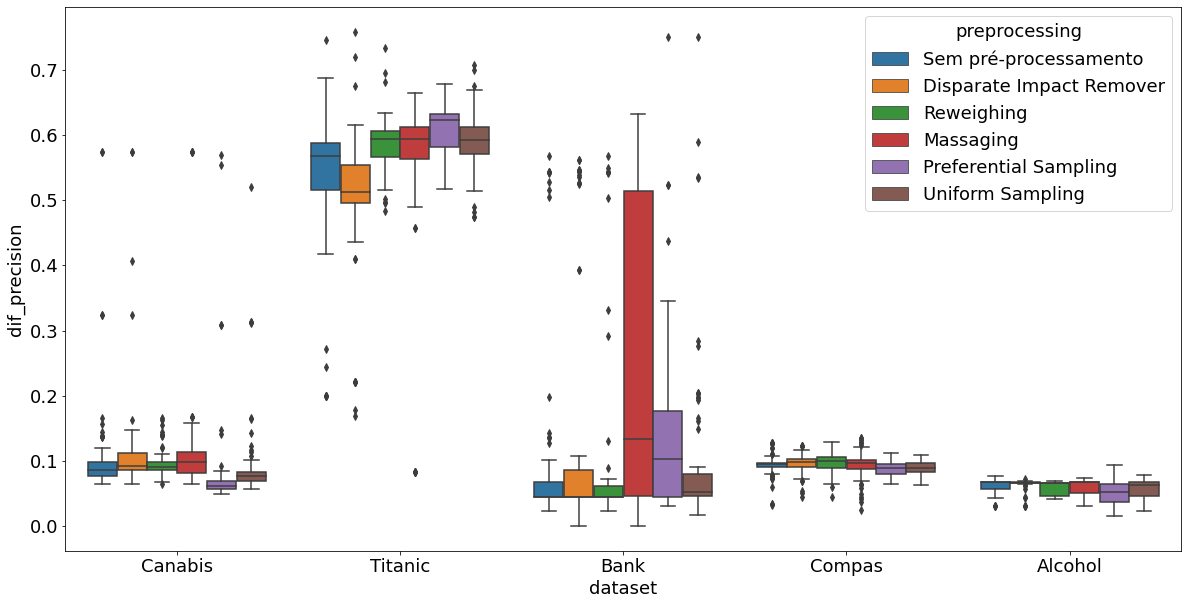

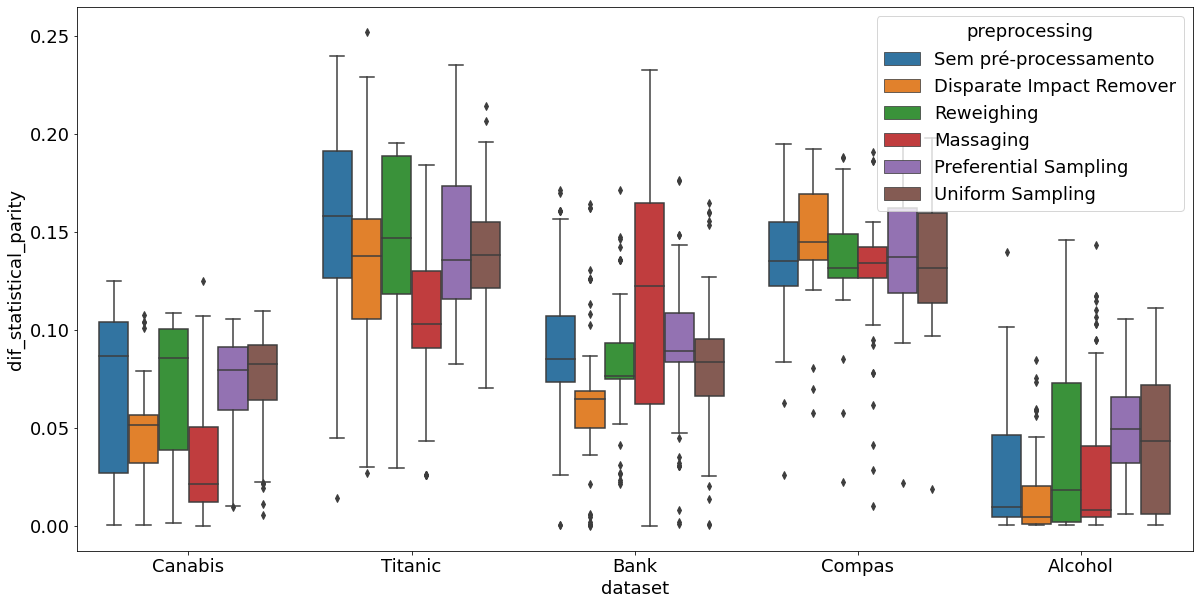

In [10]:
def generate_plots(df,metrics,plot,nro):
    plots = {'boxplot':sns.boxplot}
    for m in metrics:
        plt.figure(figsize=(20,10))
        plots[plot](x="dataset", y=m, hue="preprocessing", data=df).figure.savefig(f"img/{plot}/{plot}{nro} - {m}.png",bbox_inches = 'tight')

plt.rcParams.update({'font.size': 18})
generate_plots(new_df,performance_metrics,'boxplot',1)
generate_plots(new_df,fairness_measures,'boxplot',1)
generate_plots(new_df2,performance_metrics,'boxplot',2)
generate_plots(new_df2,fairness_measures,'boxplot',2)

